In [14]:
pip install keras

In [15]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [16]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [17]:
!nvidia-smi

Wed Oct  7 17:43:35 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    23W /  75W |    209MiB /  7611MiB |      1%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [18]:
tf.__version__

'2.3.0'

In [19]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path= '/content/drive/My Drive/colab Dataset/train_leaf'
valid_path= '/content/drive/My Drive/colab Dataset/test_leaf'

In [20]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

# vgg= VGG16(input_shape= IMAGE_SIZE+[3], weights='imagenet', include_top=False) # the weights is downloaded below from github location

# resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

inception= InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [21]:
# don't train existing weights

# for layer in vgg.layers:
#   layer.trainable= False

# for layer in resnet.layers:
#     layer.trainable = False

for layer in inception.layers:
    layer.trainable = False

In [22]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/colab Dataset/train_leaf/*')
folders

['/content/drive/My Drive/colab Dataset/train_leaf/diseased cotton leaf',
 '/content/drive/My Drive/colab Dataset/train_leaf/fresh cotton plant',
 '/content/drive/My Drive/colab Dataset/train_leaf/fresh cotton leaf',
 '/content/drive/My Drive/colab Dataset/train_leaf/diseased cotton plant']

In [23]:
# our layers - you can add more if you want

# x = Flatten()(resnet.output)

# x= Flatten()(vgg.output)

x = Flatten()(inception.output)

In [24]:
vgg.input

NameError: ignored

In [ ]:
vgg.output

In [33]:
# x= Dense(4096, activation='relu')(x)
# x = Dropout(0.5)(x)
# x= Dense(4096, activation='relu')(x)
# x = Dropout(0.5)(x)
# x= Dense(4096, activation='relu')(x)
# # x = Dropout(0.5)(x)

In [34]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object

# model = Model(inputs=resnet.input, outputs=prediction)

# model= Model(inputs= vgg.input, outputs= prediction)

model = Model(inputs=inception.input, outputs=prediction)

In [35]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [36]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [37]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(featurewise_center=True,
#                                    rotation_range=20,
#                                    width_shift_range=0.2,
#                                   height_shift_range=0.2,
#                                    rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale = 1./255)

In [38]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/colab Dataset/train_leaf',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                              class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [39]:
training_set.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [40]:
len(training_set)

122

In [41]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/colab Dataset/test_leaf',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [42]:
len(test_set) # (totalimages/batch_size) i.e no. of batches going for validating per epochs and each batch will be of 16

2

In [43]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=40,
  steps_per_epoch= len(training_set),
  validation_steps= len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
122/122 [==============================] - 843s 7s/step - loss: 2.0817 - accuracy: 0.7622 - val_loss: 1.3584 - val_accuracy: 0.7778
Epoch 2/40
122/122 [==============================] - 39s 317ms/step - loss: 1.1939 - accuracy: 0.8780 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 3/40
122/122 [==============================] - 39s 318ms/step - loss: 0.9623 - accuracy: 0.8985 - val_loss: 1.0045 - val_accuracy: 0.8333
Epoch 4/40
122/122 [==============================] - 38s 315ms/step - loss: 1.1854 - accuracy: 0.8975 - val_loss: 0.5220 - val_accuracy: 0.9444
Epoch 5/40
122/122 [==============================] - 38s 312ms/step - loss: 0.9517 - accuracy: 0.9139 - val_loss: 2.7683e-06 - val_accuracy: 1.0000
Epoch 6/40
122/122 [==============================] - 37s 306ms/step - loss: 0.9781 - accuracy: 0.9211 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 7/40
122/122 [==============================] 

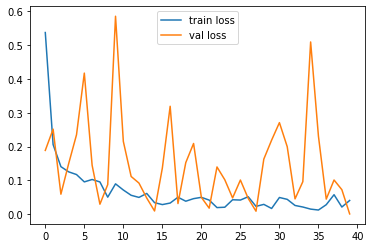

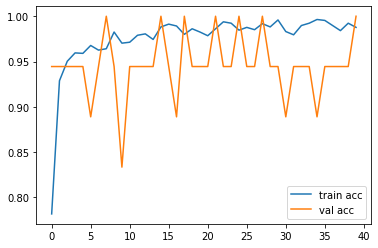

<Figure size 432x288 with 0 Axes>

In [27]:
# By VGG16 architecture, it gave good training loss and validation accuracy i.e .94


# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

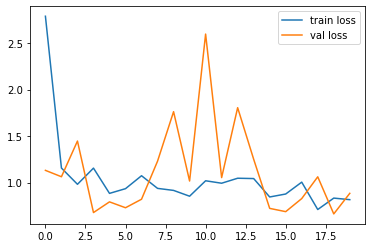

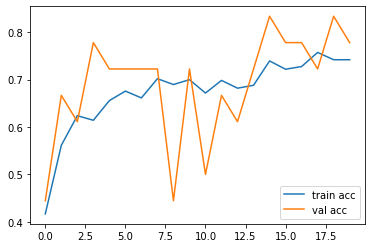

<Figure size 432x288 with 0 Axes>

In [ ]:
# By Resnet50 architecture, Resnet didn't give decrease training loss i.e .81 in 20 epochs


# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

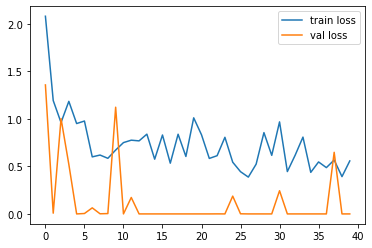

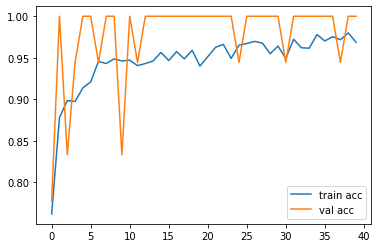

<Figure size 432x288 with 0 Axes>

In [44]:
# By InceptionV3 architecture, Resnet didn't give decrease training loss i.e .81 in 20 epochs


# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [28]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('/content/drive/My Drive/colab Dataset/cotton_leaf_model_VGG16.h5')

In [45]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('/content/drive/My Drive/colab Dataset/cotton_leaf_model_inceptionv3.h5')

In [45]:
from tensorflow.keras.models import load_model

vgg_model=load_model('/content/drive/My Drive/colab Dataset/cotton_leaf_model_VGG16.h5')

Prediction on New data

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
img=image.load_img('/content/drive/My Drive/colab Dataset/d (139)_iaip.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[ 76.,  59.,  49.],
        [ 79.,  62.,  52.],
        [ 72.,  55.,  45.],
        ...,
        [119.,  77.,  65.],
        [117.,  75.,  63.],
        [114.,  73.,  55.]],

       [[ 78.,  61.,  51.],
        [ 93.,  76.,  66.],
        [108.,  91.,  81.],
        ...,
        [117.,  77.,  65.],
        [115.,  75.,  63.],
        [113.,  74.,  57.]],

       [[111.,  94.,  84.],
        [123., 106.,  96.],
        [113.,  96.,  86.],
        ...,
        [115.,  79.,  65.],
        [113.,  77.,  63.],
        [105.,  69.,  55.]],

       ...,

       [[165., 186., 111.],
        [157., 178., 103.],
        [159., 180., 105.],
        ...,
        [168., 199., 142.],
        [145., 176., 119.],
        [144., 175., 118.]],

       [[158., 176., 102.],
        [170., 188., 114.],
        [176., 194., 120.],
        ...,
        [150., 181., 124.],
        [162., 193., 136.],
        [157., 188., 131.]],

       [[165., 119., 104.],
        [177., 163., 118.],
        [169., 1

In [ ]:
x= x/255
x

array([[[0.29803923, 0.23137255, 0.19215687],
        [0.30980393, 0.24313726, 0.20392157],
        [0.28235295, 0.21568628, 0.1764706 ],
        ...,
        [0.46666667, 0.3019608 , 0.25490198],
        [0.45882353, 0.29411766, 0.24705882],
        [0.44705883, 0.28627452, 0.21568628]],

       [[0.30588236, 0.23921569, 0.2       ],
        [0.3647059 , 0.29803923, 0.25882354],
        [0.42352942, 0.35686275, 0.31764707],
        ...,
        [0.45882353, 0.3019608 , 0.25490198],
        [0.4509804 , 0.29411766, 0.24705882],
        [0.44313726, 0.2901961 , 0.22352941]],

       [[0.43529412, 0.36862746, 0.32941177],
        [0.48235294, 0.41568628, 0.3764706 ],
        [0.44313726, 0.3764706 , 0.3372549 ],
        ...,
        [0.4509804 , 0.30980393, 0.25490198],
        [0.44313726, 0.3019608 , 0.24705882],
        [0.4117647 , 0.27058825, 0.21568628]],

       ...,

       [[0.64705884, 0.7294118 , 0.43529412],
        [0.6156863 , 0.69803923, 0.40392157],
        [0.62352943, 0

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
# img_data=preprocess_input(x)
# img_data.shape
x.shape

(1, 224, 224, 3)

In [ ]:
# y_pred= model.predict(img_data)
y_pred= model.predict(x)
y_pred

array([[6.70222e-38, 0.00000e+00, 1.00000e+00, 0.00000e+00]],
      dtype=float32)

In [ ]:
a=np.argmax(y_pred, axis=1)
a

array([2])

In [ ]:
labels= training_set.class_indices
for key,value in labels.items():
  if a==value:
    print(key)

fresh cotton leaf
